In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Python_Linear_Regres (2).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['children'] = df['children'].fillna(0)

In [4]:
df['bmi'] = df['bmi'].fillna(df.bmi.mean())

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
import seaborn as sns

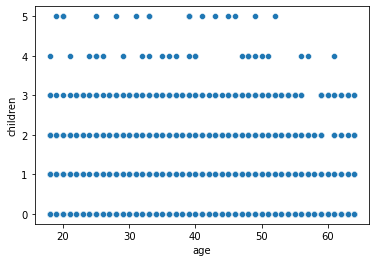

In [7]:
sns.scatterplot(x='age', y='children', data=df);

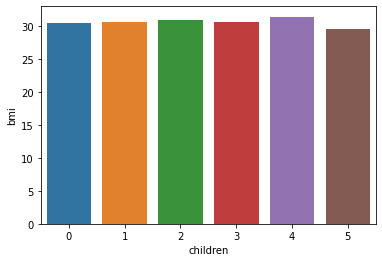

In [8]:
sns.barplot(x='children', y='bmi', data=df, ci=False);

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['charges'], axis=1)

In [14]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [15]:
y = df.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [17]:
sc = StandardScaler()

In [18]:
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [19]:
X_test_scaled = sc.transform(X_test)
X_test_scaled

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [22]:
# train score
model.score(X_train_scaled,y_train)

0.7370262574551634

In [23]:
# Test score
model.score(X_test_scaled,y_test)

0.7999876970680433

In [24]:
# Coef
model.coef_

array([ 3.57251875e+03,  2.07745794e+03,  5.28603986e+02, -7.73099946e+00,
        9.52373675e+03, -1.10681022e+02, -4.07684444e+02, -3.32163909e+02])

In [25]:
# intercept
model.intercept_

13201.182056009347

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [27]:
ypred = model.predict(X_test)

In [28]:
from math import sqrt

In [29]:
print("R2_Score: ",r2_score(y_test,ypred) )
print("Mean squared error: ", mean_squared_error(y_test,ypred))
print("Mean absolute error: ", mean_absolute_error(y_test,ypred))
print("Root Mean Squared error: ",sqrt(mean_squared_error(y_test,ypred)))

R2_Score:  -282.5085524119048
Mean squared error:  45114705263.306786
Mean absolute error:  206895.6703649445
Root Mean Squared error:  212402.2251844523
